In [2]:
from transformers import (VisionEncoderDecoderModel, 
                          AutoTokenizer,ViTImageProcessor)
import torch
from PIL import Image


In [3]:
# part 1

# vision_encoder_decoder_model_name_or_path = "yuanzhoulvpi/vit-gpt2-image-chinese-captioning"#"vit-gpt2-image-chinese-captioning/checkpoint-3200"
#
# processor = ViTImageProcessor.from_pretrained(vision_encoder_decoder_model_name_or_path)
# tokenizer = AutoTokenizer.from_pretrained(vision_encoder_decoder_model_name_or_path)
# model = VisionEncoderDecoderModel.from_pretrained(vision_encoder_decoder_model_name_or_path)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)


# part2

VIT_MODEL_NAME_OR_PATH = "google/vit-base-patch16-224"
GPT_MODEL_NAME_OR_PATH = "yuanzhoulvpi/gpt2_chinese"

vision_encoder_decoder_model_name_or_path = "vit-gpt2-image-chinese-captioning/checkpoint-3200"

processor = ViTImageProcessor.from_pretrained(VIT_MODEL_NAME_OR_PATH)
tokenizer = AutoTokenizer.from_pretrained(GPT_MODEL_NAME_OR_PATH)
model = VisionEncoderDecoderModel.from_pretrained(vision_encoder_decoder_model_name_or_path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/439k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/205 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/78.0k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/893M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/119 [00:00<?, ?B/s]

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, 

In [4]:
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}


def predict_step(image_paths):
    images = []
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")

        images.append(i_image)

    pixel_values = processor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds


predict_step(['bigdata/image_data/train-1000200.jpg'])


c:\Users\yuanz\anaconda3\envs\mynet2\lib\site-packages\transformers\generation\utils.py:1186: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(


['家 居 起 居 室 设 计 装 修 600 _ 600']

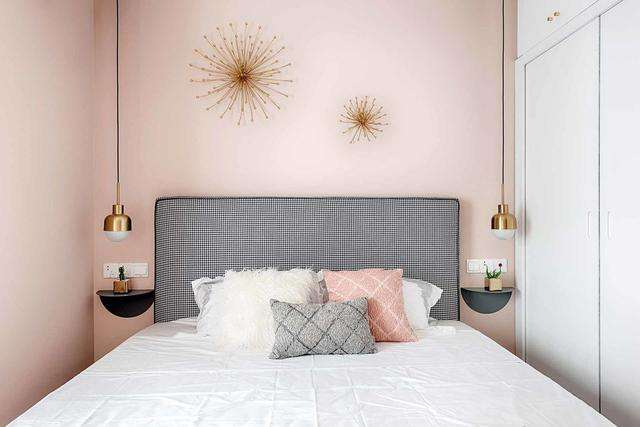

In [5]:
Image.open('bigdata/image_data/train-1000200.jpg')

In [6]:
predict_step(['bigdata/image_data/train-1000202.jpg'])

['书 法 书 法 作 品 640 _ 464']

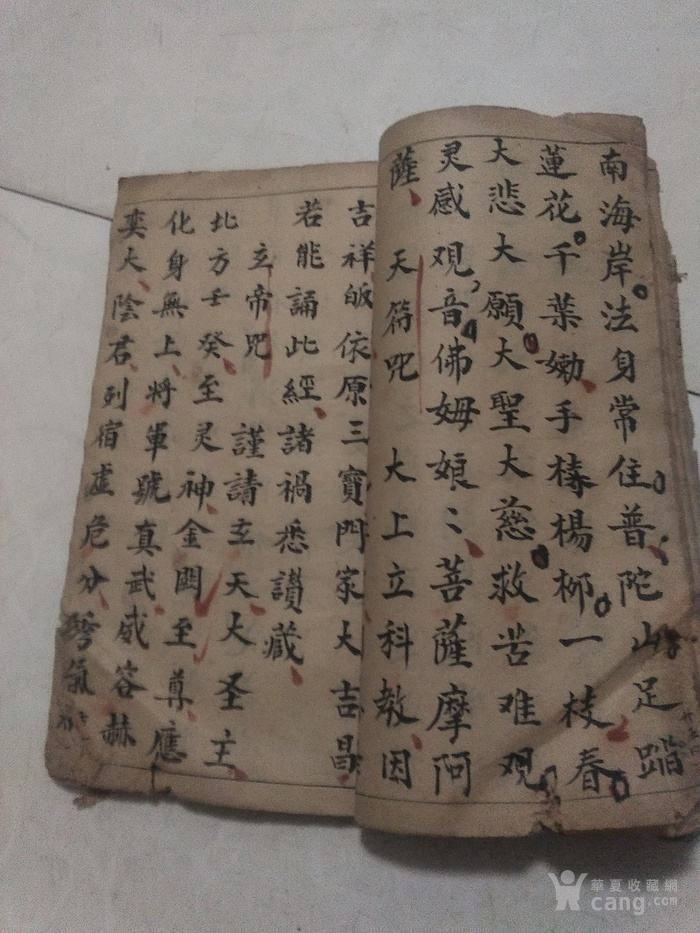

In [7]:
Image.open('bigdata/image_data/train-1000202.jpg')